<h1> US Accidents Analysis </h1>
<h5>By Rajarshi Bhattacharjee </h5>
 
###### About this project:
This project uses a Kaggle dataset on US Road Accidents containing about 5 million records and takes 3 columns of data:
1. City where accidents took place
2. Start time of accidents
3. Latitude and Longitude of occurence


to analyse and visualise the data. I have tried to answer certain questions that rose when we looked into the data using plots and visuals. 
All the steps of data importing, cleaning and visualising have been properly described here.

### Libraries and Data Import 

In [2]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
accidents_ds = 'https://www.kaggle.com/sobhanmoosavi/us-accidents/download'
od.download(accidents_ds)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [4]:
data_lcn = ('/Users/rajarshibhattacharjee/Documents/python /EDA -  US Accidents/us-accidents/US_Accidents_Dec20_updated.csv')

### Data Preparation and Cleaning

In [5]:
df = pd.read_csv(data_lcn)

In [6]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [8]:
df.describe() 

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df.select_dtypes(include=numerics) #finding numerical valued columns 


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,40.10891,-83.09286,40.11206,-83.03187,3.230,NaN,42.1,36.1,58.0,29.76,10.0,10.4,0.00
1,2,39.86542,-84.06280,39.86501,-84.04873,0.747,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
2,2,39.10266,-84.52468,39.10209,-84.52396,0.055,NaN,36.0,NaN,97.0,29.70,10.0,NaN,0.02
3,2,39.10148,-84.52341,39.09841,-84.52241,0.219,NaN,36.0,NaN,97.0,29.70,10.0,NaN,0.02
4,2,41.06213,-81.53784,41.06217,-81.53547,0.123,NaN,39.0,NaN,55.0,29.65,10.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,2,34.00248,-117.37936,33.99888,-117.37094,0.543,NaN,86.0,86.0,40.0,28.92,10.0,13.0,0.00
1516060,2,32.76696,-117.14806,32.76555,-117.15363,0.338,NaN,70.0,70.0,73.0,29.39,10.0,6.0,0.00
1516061,2,33.77545,-117.84779,33.77740,-117.85727,0.561,NaN,73.0,73.0,64.0,29.74,10.0,10.0,0.00
1516062,2,33.99246,-118.40302,33.98311,-118.39565,0.772,NaN,71.0,71.0,81.0,29.62,10.0,8.0,0.00


In [10]:
df.isna().sum() #Finding count of missing values

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [11]:
df.isna().sum().sort_values(ascending = False) #Sorting the missing values in descending order

Number                   1046095
Precipitation(in)         510549
Wind_Chill(F)             449316
Wind_Speed(mph)           128862
Humidity(%)                45509
Visibility(mi)             44211
Weather_Condition          44007
Temperature(F)             43033
Wind_Direction             41858
Pressure(in)               36274
Weather_Timestamp          30264
Airport_Code                4248
Timezone                    2302
Zipcode                      935
Sunrise_Sunset                83
Civil_Twilight                83
Nautical_Twilight             83
Astronomical_Twilight         83
City                          83
Country                        0
Give_Way                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout                     0
Railway   

In [12]:
missing_percentage = (df.isna().sum().sort_values(ascending = False) / len (df))*100
missing_percentage #Finding percentage of missing data

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
City                      0.005475
Country                   0.000000
Give_Way                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                      0.000000
Station             

In [13]:
missing_percentage_nonzero = missing_percentage[missing_percentage > 0] #removing rows without missing value
missing_percentage_nonzero

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
City                      0.005475
dtype: float64

<AxesSubplot:>

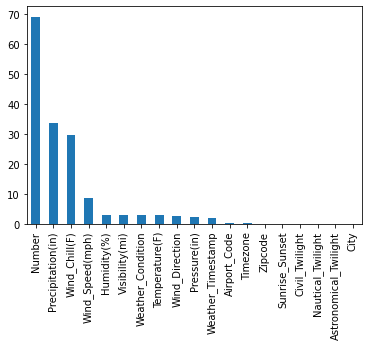

In [14]:
missing_percentage_nonzero.plot( kind = 'bar') 

This shows the distribution of missing values among the columns. Using this, we can wisely choose which columns to choose to perform analysis on

### Exploratory Analysis and Visualisation

In [15]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Columns to analyze:
1. City
2. Start Time 
3. Start Lat, Start Lng

#### Analysis using City column

In [16]:
cities = df.City.unique()
len(cities)

10658

In [17]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:25]

Los Angeles       39984
Miami             36233
Charlotte         22203
Houston           20843
Dallas            19497
Sacramento        18431
Orlando           16169
Portland          14805
San Diego         14090
Minneapolis       12653
Atlanta           11854
Chicago           11507
Saint Paul        10084
Phoenix            9934
Raleigh            9516
San Jose           9362
Richmond           8472
Nashville          8381
Riverside          8201
Jacksonville       7815
Salt Lake City     7737
Kansas City        7500
Baton Rouge        7085
Austin             7038
Oakland            6978
Name: City, dtype: int64

<AxesSubplot:>

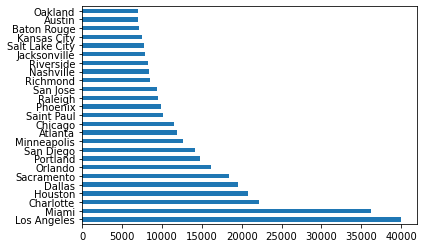

In [18]:
cities_by_accident[:25].plot(kind = "barh")

/Users/rajarshibhattacharjee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

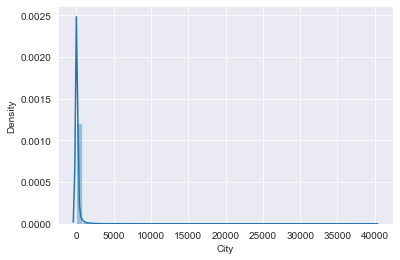

In [19]:
# plotting using seaborn
sns.set_style("darkgrid")
sns.distplot(cities_by_accident)

From this plot, we can see that majority of the accidents are concentrated in a few cities only. <br>
Further analysis,

In [20]:
high_accident_cities = cities_by_accident[cities_by_accident > 1500]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [21]:
len(high_accident_cities)/ len(cities) * 100  # checking percentage of high accident cities

1.5012197410395947

<AxesSubplot:xlabel='City', ylabel='Density'>

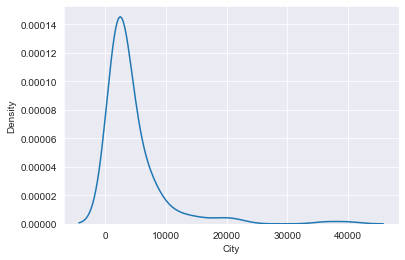

In [22]:
sns.kdeplot(high_accident_cities)

#### Insights:
- This shows that cities with more than 1500 accidents constitute only 1% of the total number of cities. <br>
  Also, from the plot, we can see that even among the 1%, the distribution is highly uneven and majority of the       accidents happen only in a few cities.<br>
- Data of New York state is missing

 #### Analysis using start time of accidents
 

In [23]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

We need to convert this into date-time format to perform analysis

In [24]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time[0] #check if it has converted to date-time

Timestamp('2016-02-08 00:37:08')

In [25]:
df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           6
           ..
1516059    18
1516060    19
1516061    19
1516062    19
1516063    18
Name: Start_Time, Length: 1516064, dtype: int64

/Users/rajarshibhattacharjee/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

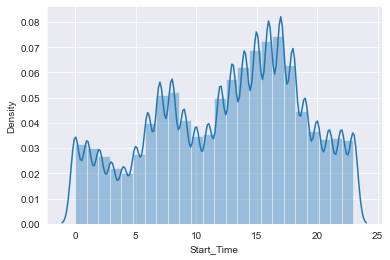

In [26]:
sns.distplot(df.Start_Time.dt.hour, bins = 24 , norm_hist = True) #plotting graph for hourwise accident scale

- A high percentage of the accidents happen between 6 am and 10 am (probably people hurrying to work)
- Next highest is between 3 pm and 6 pm ( people returning)

[Text(0.5, 0, 'Days'), Text(0, 0.5, 'number of accidents')]

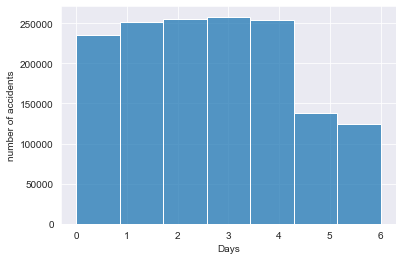

In [31]:
p = sns.histplot(df.Start_Time.dt.dayofweek, bins = 7 ) #plotting graph for daywise accident scale
p.set(xlabel = "Days" , ylabel = "number of accidents")

- Weekdays have more accidents compared to weekends
- Accidents peak in the middle of the week

Checking hourwise accident distribution for weekends and comparing it with weekdays

<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

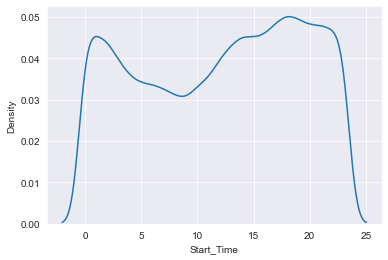

In [52]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.kdeplot(sunday_start_time.dt.hour) #plotting graph for hourwise accident scale on sundays

<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

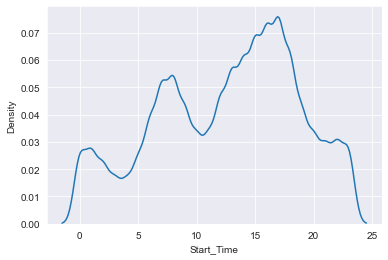

In [54]:
wednesday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 2]
sns.kdeplot(wednesday_start_time.dt.hour) #plotting graph for hourwise accident scale on wednesdays

From these distributions we can see:
- Accident distribution is very different for the weekdays and weekends
- For sundays:
    - It can be seen that accidents peak during the nighthours, mostly between 1 am and 3 am. This is probably because of people drunk driving after weekend parties
    - The accidents also peak around 3 pm, unlike the weekdays
- For Wednesday:
    - The trend is very different from the weekends and reflects the increase in accidents during the wee hours

Monthwise trend of accidents.


<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

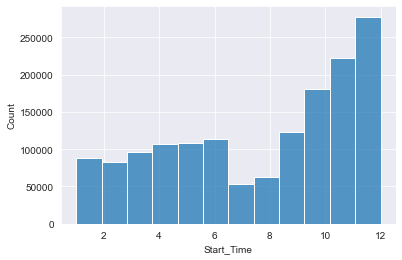

In [63]:
sns.histplot(df.Start_Time.dt.month, bins = 12) 

It seems like accidents seem to pick up as the winter months set in.

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

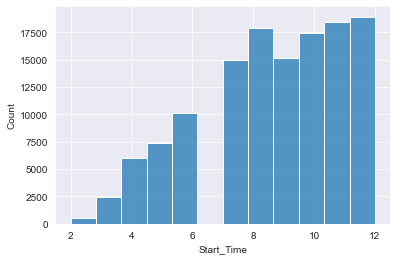

In [75]:
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.histplot(df_2016.Start_Time.dt.month, bins = 12, kde = False)

It can be seen that data is missing for certain months in 2016.
Hence visualizing accidents for all the years wont portray a proper picture.
So we use data from 2019 to see changing accident trends with changing months. 

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

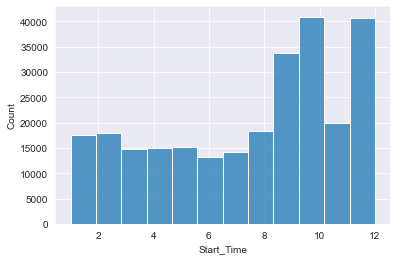

In [77]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.histplot(df_2019.Start_Time.dt.month, bins = 12, kde = False)

For 2019:
- Accidents grow as we near the end of the year but fall for the month of November.
- Accidents are much lower for the summer months as compared to the winter months. This could be due to visibility issues during the winters.

#### Analysis using Start Latitude and Longitude

In [71]:
df.Start_Lat, df.Start_Lng

(0          40.10891
 1          39.86542
 2          39.10266
 3          39.10148
 4          41.06213
              ...   
 1516059    34.00248
 1516060    32.76696
 1516061    33.77545
 1516062    33.99246
 1516063    34.13393
 Name: Start_Lat, Length: 1516064, dtype: float64,
 0          -83.09286
 1          -84.06280
 2          -84.52468
 3          -84.52341
 4          -81.53784
              ...    
 1516059   -117.37936
 1516060   -117.14806
 1516061   -117.84779
 1516062   -118.40302
 1516063   -117.23092
 Name: Start_Lng, Length: 1516064, dtype: float64)

Here:
- Latitude change : We go from top to bottom or vice versa 
- Longitude change: We go from left to right or vice versa

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

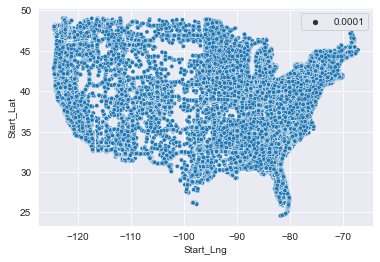

In [78]:
sns.scatterplot(x= df.Start_Lng, y = df.Start_Lat, size = 0.0001)

- This is an interesting plot as it verifies that the latitude and logitude data are correctly for the area of USA
- Accidents are lower for the states of North and South Dakota and also for parts of Kansas.

Importing folium to create a new kind of plotting

In [85]:
import folium
from folium.plugins import HeatMap

In [86]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [87]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

Acknowledgements

Please cite the following papers if you use this dataset:

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.